# Sander van de Kamp
#### 500734351 
#### 01/03/2021
# Market value prediction

In [6]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np


# Analyse
#### Goal
The goal of the dataset is to predict the future closing value of a stock based on the trends of the past 13 years based on the price differences and the volume which is traded
#### Dimension
It contains 4100 rows with 7
#### features
It contains 4 float numbers, 2 int and a date

In [2]:
df = pd.read_csv('adre.us.txt')
print(df.head(5))
print(df.dtypes)

         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  19.065  19.416  19.065  19.416   72019        0
1  2005-02-28  20.172  20.172  19.312  19.380  101346        0
2  2005-03-01  19.798  19.798  19.209  19.268   53671        0
3  2005-03-02  19.109  19.195  19.042  19.160   23894        0
4  2005-03-03  19.744  19.744  19.127  19.187   28870        0
Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object


# Prediction
## Classification
Linear regression would probably be optimal since a stock value in general is a steady slow uptrend due to inflation and growth, Logistic regression should also be a valid option but it might struggle and end up completely missing due to price fluctuations causing a downward or upward trend.
## Hyperparams
The hyperparams that can be tweaked are the C value and the solver, the C value determines the regression strength with a lower value having a higher strength than a high value. The solver is used to optimize the process, where liblinear for this dataset is probably optimal since it is designed for smaller datasets.

In [3]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', '‘newton-cg']
}

# methoden
## Preprocessing
- The main thing that needs to be encoded is the dates, the dates are currently stored in strings and both date objects and string can't be used for regression. 
- The prediction also needs to be split from the dataframe.
- The outcome has to be an int, so multiply the value with 100
## Classifiers
The two models that need to be compared are the logistic and linear regression models
## Performance metric
The performance metric required is r², in this case it is not about being right or wrong but about how close the prediction is to the actual value.

In [4]:
# preprocessing
# Changes the date to an ordinal value
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

# outcome to int
df['Close'] = (df['Close'] * 100).astype('int')

# Split outcome
df_outcome = df['Close']
df.drop('Close', axis = 1, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(df, df_outcome, test_size = 0.3, random_state = 42)


In [5]:
# Classifiers training and testing
logistic = LogisticRegression()

log_grid = GridSearchCV(estimator = logistic, param_grid = param_grid, n_jobs = -1)
log_grid.fit(X_train, y_train)
log_pred = predict = log_grid.predict(X_test)
print('Best logistic hyperparameters are \n{}'.format(log_grid.best_params_))

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
Best logistic hyperparameters are 
{'C': 0.001, 'solver': 'liblinear'}


In [7]:
linear = LinearRegression(normalize = True)
linear.fit(X_train, y_train)
lin_pred = linear.predict(X_test)

In [8]:
# Performance metric 
print('Linear R2 score:{}'.format(r2_score(y_test, lin_pred)))
print('Logistic R2 score:{}'.format(r2_score(y_test, log_pred)))

Linear R2 score:0.999123141938825
Logistic R2 score:-0.1315520594309445


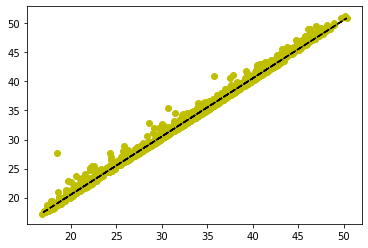

In [19]:
from matplotlib import pyplot as plt
x = df['Low']
y = df['High']

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.show()

# Results
Linear regression has a very good R2 score, which means that the predictions it makes are pretty much on point.
The linear regression seems to match the prediction, but the negative R2 score from the logistic regression was unexpected. The negative score means that the logistic regression fits worse than a horizontal line to the testing data. Which means that it is basically useless.

# Evaluation
I have realised after finishing this dataset that logistic regression is not actually used for regression models, which is why the R2 score for logistic regression is completely useless compared to the linear regression. Outside of that I was not expecting linear regression to be this accurate for the dataset, but it seems the actual values in the dataset are linear.

# literatuurverwijzingen
Regressie analyse:
https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy